In [1]:
# Aarjav Jain
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, pi
from numpy import array
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import mean_squared_error, r2_score
from __future__ import division, print_function
from pylab import plot, xlabel, ylabel, show

Streaming output truncated to the last 5000 lines.
95000 95.0
95001 95.001
95002 95.002
95003 95.003
95004 95.004
95005 95.005
95006 95.006
95007 95.007
95008 95.008
95009 95.009
95010 95.01
95011 95.011
95012 95.012
95013 95.013
95014 95.014
95015 95.015
95016 95.016
95017 95.017
95018 95.018
95019 95.019
95020 95.02
95021 95.021
95022 95.022
95023 95.023
95024 95.024
95025 95.025
95026 95.026
95027 95.027
95028 95.028
95029 95.029
95030 95.03
95031 95.031
95032 95.032
95033 95.033
95034 95.034
95035 95.035
95036 95.036
95037 95.037
95038 95.038
95039 95.039
95040 95.04
95041 95.041
95042 95.042
95043 95.043
95044 95.044
95045 95.045
95046 95.046
95047 95.047
95048 95.048
95049 95.049
95050 95.05
95051 95.051
95052 95.052
95053 95.053
95054 95.054
95055 95.055
95056 95.056
95057 95.057
95058 95.058
95059 95.059
95060 95.06
95061 95.061
95062 95.062
95063 95.063
95064 95.06400000000001
95065 95.065
95066 95.066
95067 95.06700000000001
95068 95.068
95069 95.069
95070 95.07000000000001
9

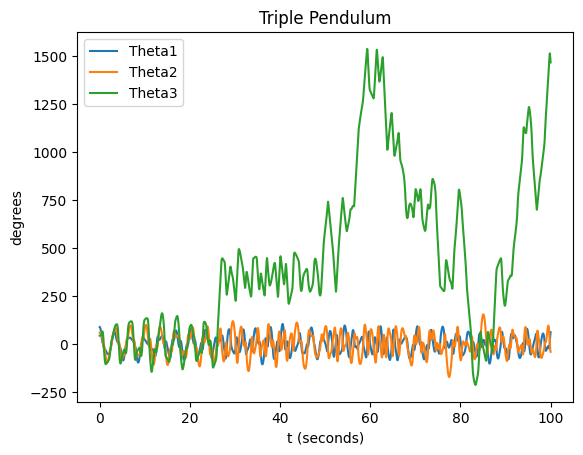

In [5]:
g = 9.81
l1 = 1
l2 = 1
l3= 1
m1 = 1.0
m2 = 1.0
m3 = 1.0

def f(q, t):
    '''Triple Pendulum equation of motion'''

    # Define relevant parameters

    # Define useful mass combinations
    m12 = m2 + m3
    m012 = m1 + m2 + m3
    mf = m012/4

    # Define useful sines
    sin0 = np.sin(q[0])
    sin1 = np.sin(q[2])
    sin2 = np.sin(q[4])

    # Define useful sine and cosine of differences
    cos01 = np.cos(q[0]-q[2])
    cos02 = np.cos(q[0]-q[4])
    cos12 = np.cos(q[2]-q[4])
    sin01 = np.sin(q[0]-q[2])
    sin02 = np.sin(q[0]-q[4])
    sin12 = np.sin(q[2]-q[4])

    # Define useful recurrent patterns
    r1 = m12*cos01*cos02 - m012*cos12
    r2 = m012 - m12*(cos01)**2
    r3 = -m012 + m3*(cos02)**2

    # Define parts of the first equation
    od1_1 = 4*m3*m12
    od1_2 = r1*cos01 + r2*cos02
    od1_3 = -g*sin2 + l1*sin02*q[1]**2 + l2*sin12*q[3]**2
    od1_4 = -g*m2*sin1 - g*m3*sin1 + l1*m2*sin01*q[1]**2 + l1*m3*sin01*q[1]**2 - l3*m3*sin12*q[5]**2
    od1_5 = -m3*m12*( -cos02 + np.cos(q[0]-2*q[2]+q[4]) )**2 * m012
    od1_6 = g*m1*sin0 + g*m2*sin0 + g*m3*sin0 + l2*m2*sin01*q[3]**2 + l2*m3*sin01*q[3]**2 + l3*m3*sin02*q[5]**2
    od1_7 = m3*r1**2 + m12*r3*r2

    # Define parts of the second equation
    od2_1 = -g*sin2 + l1*sin02*q[1]**2 + l2*sin12*q[3]**2
    od2_2 = g*m1*sin0 + g*m2*sin0 + g*m3*sin0 + l2*m2*sin01*q[3]**2 + l2*m3*sin01*q[3]**2 + l3*m3*sin02*q[5]**2
    od2_3 = -g*m2*sin1 - g*m3*sin1 + l1*m2*sin01*q[1]**2 + l1*m3*sin01*q[1]**2 - l3*m3*sin12*q[5]**2

    # Define parts of the thirds equation
    od3_1 = g*m1*sin0 + g*m2*sin0 + g*m3*sin0 + l2*m2*sin01*q[3]**2 + l2*m3*sin01*q[3]**2 + l3*m3*sin02*q[5]**2
    od3_2 = -g*sin2 + l1*sin02*q[1]**2 + l2*sin12*q[3]**2
    od3_3 = g*m2*sin1 + g*m3*sin1 - l1*m2*sin01*q[1]**2 - l1*m3*sin01*q[1]**2 + l3*m3*sin12*q[5]**2

    # ThetaDot equations
    td1 = q[1]
    td2 = q[3]
    td3 = q[5]

    # OmegaDot equations
    od1 = mf * ( od1_1 * od1_2 * od1_3 * r2 - 4 * ( -m3 * od1_2 * r1 + ( m3 * r1**2 + m12 * r3 * r2 ) * cos01 ) * od1_4 - ( od1_5 + 4*m3*r1**2 + 4*m12*r3*r2 ) * od1_6 ) / ( l1 * od1_7 * m012 * r2)
    od2 = ( -m3 * r1 * m012 * od2_1 * r2 - ( m3 * ( r1*cos01 + r2*cos02 ) * r1 - ( m3*r1**2 + m12*r3*r2 ) * cos01 ) * od2_2 + m012*r3*r2*od2_3 ) / ( l2 * od1_7 * r2 )
    od3 = -( m12 * (od1_2) * (od3_1) + m12 * m012 * (od3_2) * r2 - r1*m012 * od3_3 ) / ( l3 * ( m3*r1**2 + m12*r3*r2 ) )

    return np.array([td1, od1, td2, od2, td3, od3])

a = 0.0
b = 100
N = 100000
h = (b - a) / N

tpoints = np.arange(a, b, h)
theta1_points = np.zeros_like(tpoints)  # Preallocate arrays with zeros
theta2_points = np.zeros_like(tpoints)
theta3_points = np.zeros_like(tpoints)

q = np.array([np.pi / 2, 0, np.pi / 3, 0, np.pi / 4, 0], float)  # Initial conditions

for i, t in enumerate(tpoints):
    theta1_points[i] = q[0] * 180 / np.pi  # Convert to degrees
    theta2_points[i] = q[2] * 180 / np.pi
    theta3_points[i] = q[4] * 180 / np.pi

    k1 = h * f(q, t)
    k2 = h * f(q + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(q + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(q + k3, t + h)
    q += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    print(i, t)

plt.plot(tpoints, theta1_points, label='Theta1')
plt.plot(tpoints, theta2_points, label='Theta2')
plt.plot(tpoints, theta3_points, label='Theta3')
plt.title("Triple Pendulum")
xlabel("t (seconds)")
ylabel("degrees")
plt.legend()
plt.show()
data = np.stack((theta1_points, theta2_points, theta3_points), axis=1)
np.save('pendulum_data.npy', data)

data = np.load('pendulum_data.npy')

# Normalize Data
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

Epoch 1, Train Loss: 0.1021, Validation Loss: 0.0001
Epoch 2, Train Loss: 0.0001, Validation Loss: 0.0001
Epoch 3, Train Loss: 0.0000, Validation Loss: 0.0000
Epoch 4, Train Loss: 0.0000, Validation Loss: 0.0000
Epoch 5, Train Loss: 0.0000, Validation Loss: 0.0001
Epoch 6, Train Loss: 0.0001, Validation Loss: 0.0000
Epoch 7, Train Loss: 0.0001, Validation Loss: 0.0001
Epoch 8, Train Loss: 0.0001, Validation Loss: 0.0001
Epoch 9, Train Loss: 0.0000, Validation Loss: 0.0000
Epoch 10, Train Loss: 0.0000, Validation Loss: 0.0000
Epoch 11, Train Loss: 0.0000, Validation Loss: 0.0000
Epoch 12, Train Loss: 0.0000, Validation Loss: 0.0000
Epoch 13, Train Loss: 0.0000, Validation Loss: 0.0000
Epoch 14, Train Loss: 0.0000, Validation Loss: 0.0000
Epoch 15, Train Loss: 0.0000, Validation Loss: 0.0000
Epoch 16, Train Loss: 0.0000, Validation Loss: 0.0000
Epoch 17, Train Loss: 0.0000, Validation Loss: 0.0000
Epoch 18, Train Loss: 0.0000, Validation Loss: 0.0000
Epoch 19, Train Loss: 0.0000, Validat

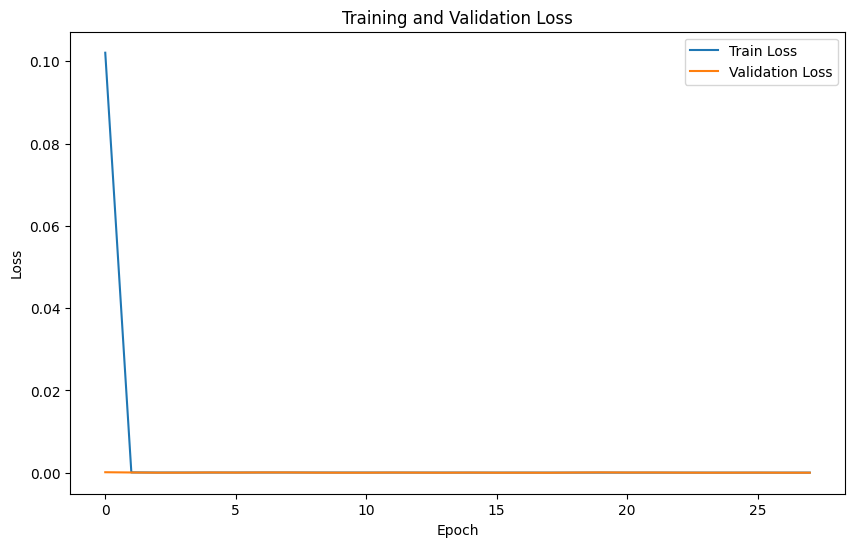

Test RMSE: 0.002063203137367964
R^2 Score: 0.9999237098975985


In [6]:
# Create Sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Create Training and Testing Sets
SEQ_LENGTH = 50
X, Y = create_sequences(data, SEQ_LENGTH)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(Y_train, dtype=torch.float32))
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(Y_test, dtype=torch.float32))

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

# Initializing and Defining Vanilla RNN Model
class VanillaRNNModel(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size):
        super(VanillaRNNModel, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.rnn = nn.RNN(input_size, hidden_layer_size, batch_first=True)
        self.linear = nn.Linear(hidden_layer_size, output_size)
    def forward(self, x):
        rnn_output, _ = self.rnn(x)
        last_time_step = rnn_output[:, -1, :]
        y_pred = self.linear(last_time_step)
        return y_pred

input_size = 3
hidden_layer_size = 100
output_size = 3
model = VanillaRNNModel(input_size, hidden_layer_size, output_size)

# Initializing weights and biases
for name, param in model.named_parameters():
    if 'weight' in name:
        nn.init.xavier_normal_(param)  # Xavier initialization
    elif 'bias' in name:
        nn.init.uniform_(param, -5, 5)

# Initializing loss and optimizer functions
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
NUM_EPOCHS = 150
PATIENCE = 10

# Training model with loss tracking and early stopping
train_losses = []
val_losses = []

def train_model(model, train_loader, val_loader, num_epochs, patience):
    best_val_loss = float('inf')
    epochs_no_improve = 0
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for sequences, targets in train_loader:
            optimizer.zero_grad()
            y_pred = model(sequences)
            loss = loss_function(y_pred, targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)
        train_losses.append(train_loss)
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for sequences, targets in val_loader:
                y_pred = model(sequences)
                loss = loss_function(y_pred, targets)
                val_loss += loss.item()
        val_loss /= len(val_loader)
        val_losses.append(val_loss)
        print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')
        # Check for early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
        if epochs_no_improve == patience:
            print(f'Early stopping at epoch {epoch+1}')
            break

train_model(model, train_loader, test_loader, NUM_EPOCHS, PATIENCE)

# Plotting Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Evaluating the model
def evaluate_model(model, test_loader):
    model.eval()
    test_loss = 0
    all_predictions = []
    all_targets = []
    with torch.no_grad():
        for sequences, targets in test_loader:
            y_pred = model(sequences)
            loss = torch.sqrt(loss_function(y_pred, targets))
            test_loss += loss.item()
            # Append predictions and targets without reshaping
            all_predictions.append(y_pred.detach().cpu().numpy())
            all_targets.append(targets.detach().cpu().numpy())
    avg_test_loss = test_loss / len(test_loader)
    # Concatenate along the batch dimension (axis=0)
    all_predictions = np.concatenate(all_predictions, axis=0)
    all_targets = np.concatenate(all_targets, axis=0)
    # Reshape to match for r2_score: (num_samples, num_outputs)
    rmse = np.sqrt(mean_squared_error(all_targets, all_predictions))
    print(f'Test RMSE: {rmse}')
    r2 = r2_score(all_targets, all_predictions)
    print(f'R^2 Score: {r2}')

evaluate_model(model, test_loader)